In [250]:
import pandas as pd
import pickle

import seaborn as sns

import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , learning_curve
from sklearn.metrics import confusion_matrix , roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from yellowbrick.classifier import ConfusionMatrix
from imblearn.over_sampling import SMOTE 



np.warnings.filterwarnings('ignore')

In [251]:
df = pd.read_csv("clean.csv")
df

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
476,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
477,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
478,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [252]:
categ = ["Gender" , "Dependents",  "Married" , "Education" , "Self_Employed" , "Property_Area" , "Loan_Status"]
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)


In [253]:

X = df.drop(["Loan_Status" ], axis=1)
# X is the dataframe without the target 

y = df.Loan_Status
#y is the target 

In [254]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#we are splitting the dataset with train test split a test size of 30 percent of test and 70 percent of train 


In [255]:

from sklearn.decomposition import PCA
preprocessing_ss = Pipeline(steps=[
    ('standard scaler', StandardScaler())])

preprocessing_mms = Pipeline(steps=[ 
   ('Minmax',MinMaxScaler())])

preprocessing_sm = SMOTE(sampling_strategy='auto')
pcas = PCA()
model = linear_model.LogisticRegression()
#the dataset is really umbalanced so i ill need the smote to compare once i found a decent model 
#standard scaler and min max scaler will be for the other models

In [256]:
pipeline_log = Pipeline(steps = [['preprocessing_Standard_scaler'  , preprocessing_ss],
                                ['classifier', model]
                                     ])

In [257]:
n_components = list(range(1,X.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']


parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

In [258]:
clf_GS = GridSearchCV(pipeline_log, parameters)

In [259]:
t =pipeline_log.fit(X_train , y_train)

In [260]:
t.best_params_

AttributeError: 'Pipeline' object has no attribute 'best_params_'

In [ ]:
print("accuracy train : %.3f"%pipeline_log.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_log.score(X_test , y_test))
#the result or pretty low but this is normal because i a using a dummy classiffier

accuracy train : 0.810
accuracy test : 0.799


AttributeError: 'Pipeline' object has no attribute 'best_params_'

In [ ]:
y_pred_log = pipeline_log.predict(X_test)
y_pred_log

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred_log))
#we are going to base or result on the recall we will need the 0 to be really low and the 1 to be really hight
#this is because in a bank you don't wan't to predict people like that : they can get a loan but actually they shouldn't be able to get it
#0 is the number of people that or not getting it but if the score is high this means a lot of people that shouldn't get the loan will get it 
#1 needs to be high because they are the good prediction of people who can correctly get the loan

              precision    recall  f1-score   support

           0       1.00      0.34      0.51        44
           1       0.78      1.00      0.87       100

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144



<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

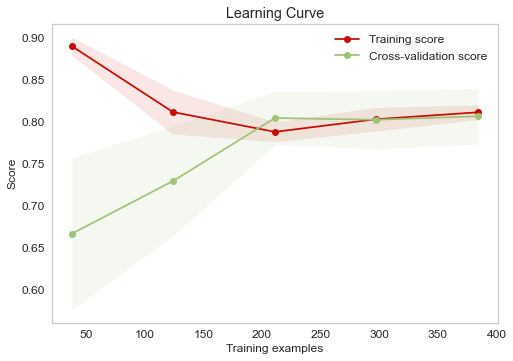

In [ ]:
plot_learning_curve(pipeline_log, X , y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

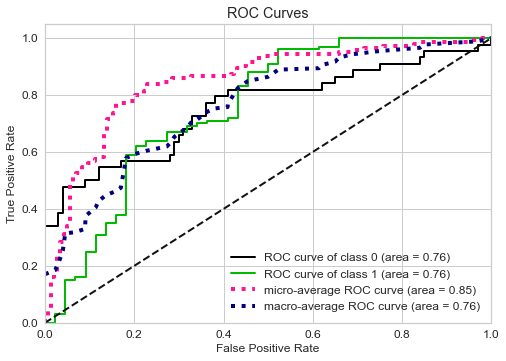

In [ ]:
pipeline_log.fit(X_train, y_train)
y_probas = pipeline_log.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

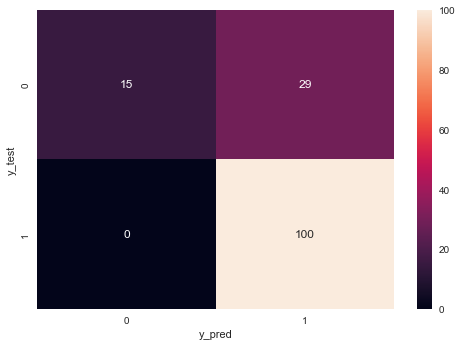

In [ ]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()
#what we need to reduce is the false positive on the top right overwhise it's decent but not great

In [ ]:
pipeline_logsmote.fit(X_train , y_train)


Pipeline(steps=[('preprocessing_smote', SMOTE()),
                ['classifier', LogisticRegression()]])

accuracy train : 0.768
accuracy test : 0.688
              precision    recall  f1-score   support

           0       0.49      0.41      0.44        44
           1       0.76      0.81      0.78       100

    accuracy                           0.69       144
   macro avg       0.62      0.61      0.61       144
weighted avg       0.67      0.69      0.68       144



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

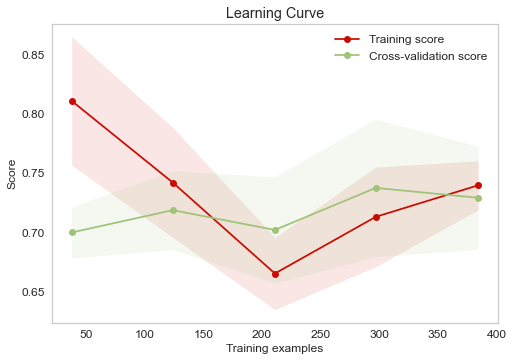

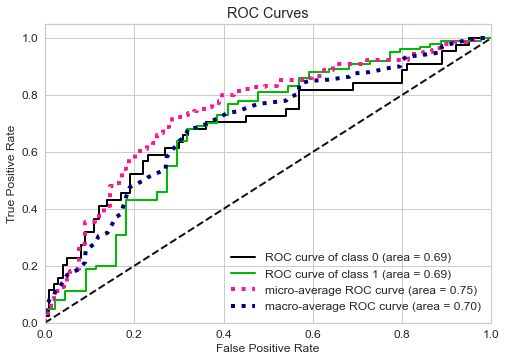

In [ ]:
print("accuracy train : %.3f"%pipeline_logsmote.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_logsmote.score(X_test , y_test))
y_pred_logsmote = pipeline_logsmote.predict(X_test)
y_pred_logsmote
print(classification_report(y_test, y_pred_logsmote))
plot_learning_curve(pipeline_logsmote, X , y)
pipeline_logsmote.fit(X_train, y_train)
y_probas = pipeline_logsmote.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

In [ ]:
with open('model_pkl.pickle', 'wb') as files:
    pickle.dump(pipeline_log, files)